# Time Series Analysis of Engagement Metrics

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data
df = pd.read_csv('../clean_data/cleaned_data.csv')

# change name of columns: 
# legal_entity_name	to company, and period_end_date	to date
df.rename(columns={'legal_entity_name': 'company', 'period_end_date': 'date'}, inplace=True)

# sort by company and date
df.head()

,company,date,Ticker,followers,pictures,videos,comments,likes,compset_group_Beauty & Personal Care,compset_group_Food & Beverages,compset_group_Home Improvement & Appliances,compset_group_Luxury & Premium & Mainstream & Entertainment,compset_group_Retail
0,AbbVie,7/24/21,ABBV,5477,3,4,0,180,1,0,0,0,0
1,AbbVie,7/31/21,ABBV,5761,5,4,0,246,1,0,0,0,0
2,AbbVie,8/7/21,ABBV,5933,5,3,0,222,1,0,0,0,0
3,AbbVie,8/14/21,ABBV,6104,5,3,0,252,1,0,0,0,0
4,AbbVie,8/21/21,ABBV,6354,5,2,0,248,1,0,0,0,0


In [3]:
# count of companies
df['company'].nunique()

214

In [4]:
# columns
df.columns

Index(['company', 'date', 'Ticker', 'followers', 'pictures', 'videos',
       'comments', 'likes', 'compset_group_Beauty & Personal Care',
       'compset_group_Food & Beverages',
       'compset_group_Home Improvement & Appliances',
       'compset_group_Luxury & Premium & Mainstream & Entertainment',
       'compset_group_Retail'],
      dtype='object')

### Time series for one company: Estee Lauder

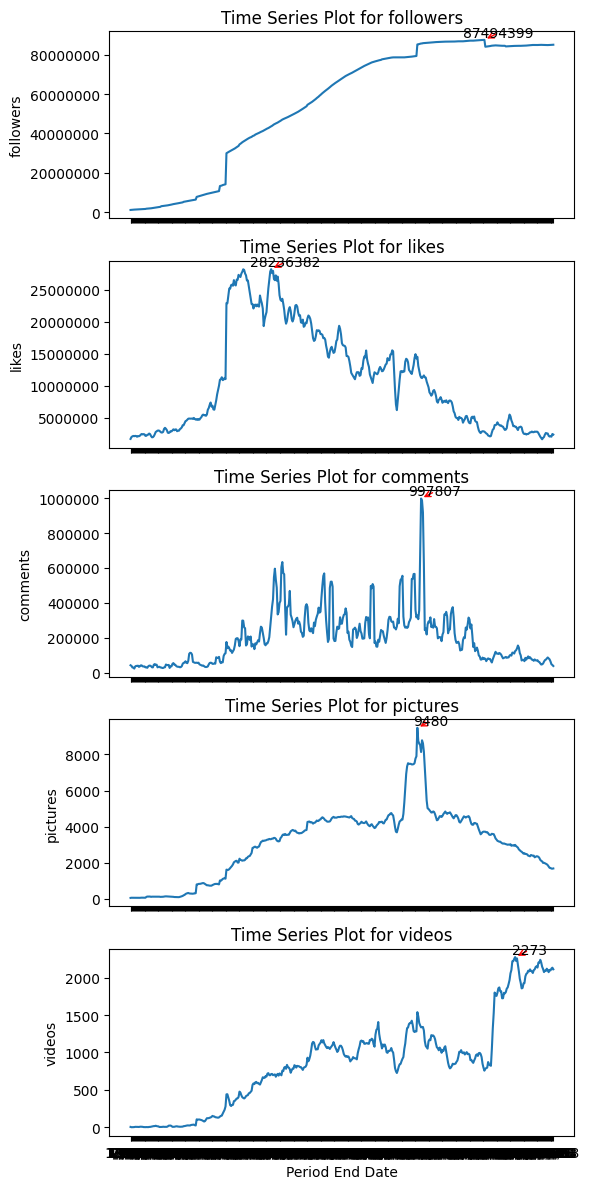

In [5]:
estee_lauder_df = df[df['company'] == "Estee Lauder"]

# Metrics to plot
metrics = ['followers', 'likes', 'comments', 'pictures', 'videos']

# Plotting
fig, axs = plt.subplots(len(metrics), 1, figsize=(6, 12), sharex=True)

for i, metric in enumerate(metrics):
    axs[i].plot(estee_lauder_df['date'], estee_lauder_df[metric], linestyle='-')
    axs[i].set_title(f'Time Series Plot for {metric}')
    axs[i].set_ylabel(metric)
    # Disable scientific notation
    axs[i].ticklabel_format(style='plain', axis='y')
    
    # Find and annotate the maximum point
    max_value = estee_lauder_df[metric].max()
    max_date = estee_lauder_df[estee_lauder_df[metric] == max_value]['date'].iloc[0]
    axs[i].annotate(f'{max_value}', xy=(max_date, max_value), xytext=(10, 0), 
                    textcoords='offset points', ha='center', va='bottom',
                    arrowprops=dict(arrowstyle='->', color='red'))

plt.xlabel('Period End Date')
plt.tight_layout()
plt.show()